<a href="https://colab.research.google.com/github/codml/AI_jupyter/blob/main/chapter_4_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
from tensorflow.keras.datasets import boston_housing

(train_data, train_targets), (test_data, test_targets) = (boston_housing.load_data())

import numpy as np

mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std
test_data -= mean
test_data /= std # 정규화에 쓰이는 평균, 표준편차도 훈련 데이터에서!

In [8]:
from tensorflow import keras
from keras import layers

def build_model():
    model = keras.Sequential([
        layers.Dense(64, activation='relu'),
        layers.Dense(64, activation='relu'),
        layers.Dense(1)
    ])
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

k = 4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []
for i in range(k):
    print(f'#{i}번째 폴드 처리중')
    val_data = train_data[i*num_val_samples: (i+1)*num_val_samples]
    val_targets = train_targets[i*num_val_samples: (i+1)*num_val_samples]
    partial_train_data = np.concatenate([
        train_data[:i*num_val_samples],
        train_data[(i+1)*num_val_samples:]
    ], axis=0)
    partial_train_targets = np.concatenate([
        train_targets[:i*num_val_samples],
        train_targets[(i+1)*num_val_samples:]
    ], axis=0)
    model=build_model()
    model.fit(partial_train_data, partial_train_targets,
              epochs=num_epochs, batch_size=16, verbose=0)
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)
print(f'all scores: {all_scores}')
print(f'mean: {np.mean(all_scores)}')

#0번째 폴드 처리중
#1번째 폴드 처리중
#2번째 폴드 처리중
#3번째 폴드 처리중
all scores: [2.216264486312866, 2.553717851638794, 2.3074100017547607, 2.518169641494751]
mean: 2.398890495300293


#0번째 폴드 처리중
#1번째 폴드 처리중
#2번째 폴드 처리중
#3번째 폴드 처리중


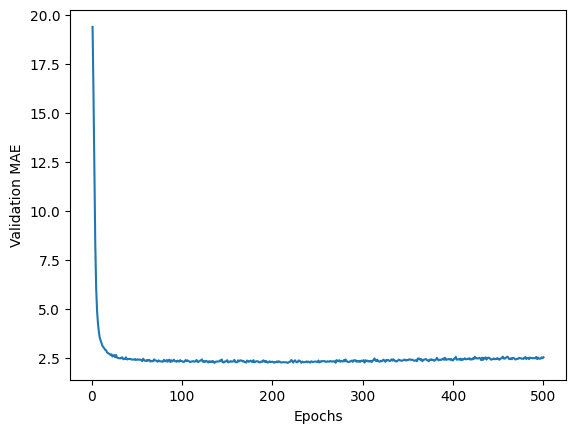

In [9]:
num_epochs = 500
all_mae_histories = []
for i in range(k):
    print(f'#{i}번째 폴드 처리중')
    val_data = train_data[i*num_val_samples: (i+1)*num_val_samples]
    val_targets = train_targets[i*num_val_samples: (i+1)*num_val_samples]
    partial_train_data = np.concatenate([
        train_data[:i*num_val_samples],
        train_data[(i+1)*num_val_samples:]
    ], axis=0)
    partial_train_targets = np.concatenate([
        train_targets[:i*num_val_samples],
        train_targets[(i+1)*num_val_samples:]
    ], axis=0)
    model=build_model()
    history = model.fit(partial_train_data, partial_train_targets,
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=16, verbose=0)
    mae_history = history.history['val_mae']
    all_mae_histories.append(mae_history)

import matplotlib.pyplot as plt

average_mae_history = [np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

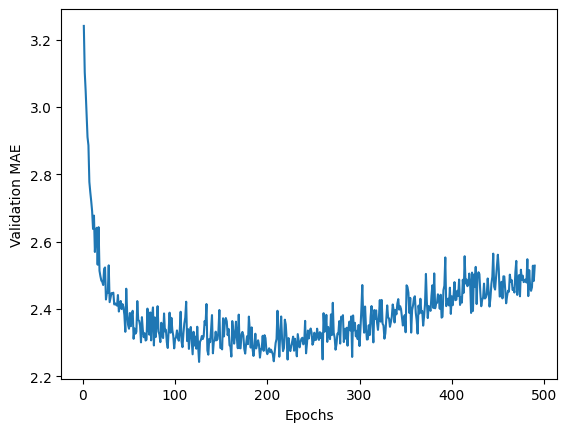

In [10]:
truncated_mae_history = average_mae_history[10:]
plt.plot(range(1, len(truncated_mae_history) + 1), truncated_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [11]:
model = build_model()
model.fit(train_data, train_targets,
          epochs=130, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)
print(test_mae_score)

4/4 [==============================] - 0s 4ms/step - loss: 13.2894 - mae: 2.4641
2.4640703201293945


In [12]:
predictions = model.predict(test_data)
predictions[0]

4/4 [==============================] - 0s 3ms/step


array([6.8356133], dtype=float32)